# This is my first project
## The Goal is to Clean the data
1) Locate and clean the missing values

2) Locate and clean the duplicate values

3) A little bit feature engineering and manipulate the column

In [1]:
#First thing first we import the module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The datasets that we're gonna use in this exercise is Netflix Datasets from Kaggle

Here's the link https://www.kaggle.com/datasets/shivamb/netflix-shows

In [2]:
#We read the datasets
df = pd.read_csv('netflix_titles.csv')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#1 From the df.info() we notice that ther are lots of missing values.
Now we're gonna look closer and treat it

In [3]:
#I wanna know all the total of the missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Since the mising values of 'director', 'cast' and 'country' is big we are not gonna delete it but we're gonna replace it to unknown.
But First we gonna drop the missing value on date_added, rating, and duration

In [4]:
#drop missing values using dropna in selected columns
df = df.dropna(subset=['date_added','rating','duration'])

#now we fillna unknown to director cast and country column
df = df.fillna('unknown')

#now we do check our new dataset after we modify it
df.shape #(8790,12)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#2 Now were going to looking for duplicate value. Show id is the unique value
for every show so we know where to start

In [5]:
#Using duplicated to locate the duplicate value of show id
df.duplicated(subset=['show_id']).sum()

#result = 0. Lets making sure by checking the title also

df.duplicated(subset=['title']).sum()

#We also get the 0 result.

#.sum() above is used because the result of duplicated is boolean and True =1
# so we can get the total of duplicate value

0

I wanna dive a little bit deeper to make sure no duplicate data by stripping
the title value so we can assume theres no double space and there are no duplicate in our data

In [6]:
#Replace the space so theres no whitespace between the characters
title_strip = df.title.str.replace(' ','')

#We check again using the duplicated method
title_strip.duplicated().sum()

#we got the 0 result. okay there are no duplicate so we good to go!

0

## Feature Engineering
#3 Adjust the datatype for selected Columns

#3.1 Adjust the date_added features datatype<br>
&emsp;After thorough observation of the values of the data_added features 
<br>&emsp;I Found that the value contains whitespace at first for some columns
<br>&emsp;Let's Fix this

In [7]:
#first we take the series and srip the left whitespaces
date_dirty = df.date_added
date_dirty = date_dirty.str.lstrip()

#Then we use to_datetime adjusted to the format
date_clean = pd.to_datetime(date_dirty, format= '%B %d, %Y')
date_clean = date_clean.astype('datetime64')

#We got the right format now we add the features
df['date_added'] = date_clean

#3.2 Adjust the value of selected Columns, so it only consist of 1 value

In [8]:
country_dirty = df['country']
country_dirty.value_counts()

#I use partition to split the values with comma separator
country_clean = country_dirty.str.partition(',').drop(columns=[1,2])

#Then i strip the data to make sure it clean
country = country_clean[0].str.strip()
df['country'] = country

In [9]:
#now adjust the value of listed_in columns
listed = df.listed_in
listed = listed .str.split(pat=',', expand = True).drop(columns=[1,2])

#and add it to our dataframe
df['listed_in'] = listed

#3.3 Drop the unneeded columns

In [10]:
df = df.drop(columns=['cast','description'])
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,Docuseries
4,s5,TV Show,Kota Factory,unknown,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,United States,2019-11-20,2007,R,158 min,Cult Movies
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2019-11-01,2009,R,88 min,Comedies
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2020-01-11,2006,PG,88 min,Children & Family Movies


# Data Visualization

#1 Now I want to visualize the percentage of movie and tv show from the type

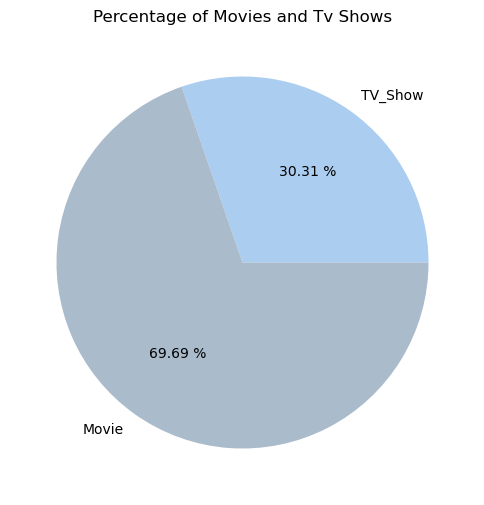

In [33]:
#We need to define the dimension first
tv_show = df.loc[df.type == 'TV Show'].count()[0]
movie = df.loc[df.type == 'Movie'].count()[0]

plt.figure(figsize=(6,12))
labels = ['TV_Show', 'Movie']
colors = ['#abcdef', '#aabbcc']

plt.title('Percentage of Movies and Tv Shows')

plt.pie([tv_show,movie], labels=labels, colors=colors, autopct='%.2f %%');


#2 The distribution of tv show and movie throughout the years

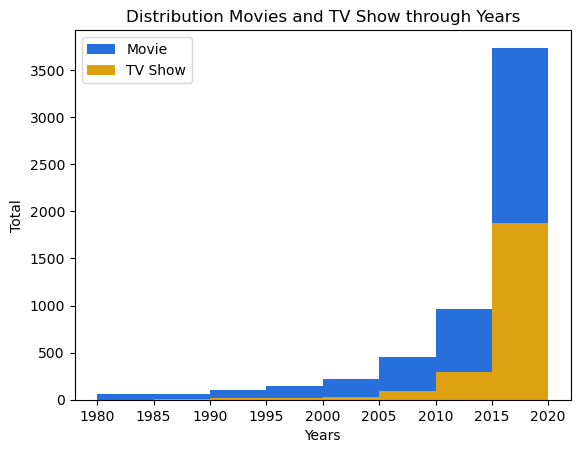

In [98]:
movie_all = df.loc[df.type=='Movie']
tvshow_all = df.loc[df.type=='TV Show']

bins = [x for x in range(1980,2022,5)]

plt.title('Distribution Movies and TV Show through Years')


plt.xlabel('Years')
plt.ylabel('Total')

plt.hist(movie_all.release_year, bins = bins, color = '#276fdb')
plt.hist(tvshow_all.release_year, bins = bins, color= '#dea112')

plt.legend(['Movie','TV Show'],loc='upper left');

In [83]:
df_top3 = df.loc[(df['country']=='United States') | (df['country']=='India')\
                |(df['country']=='United Kingdom')]


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
4,s5,TV Show,Kota Factory,unknown,India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
7,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,Dramas
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,British TV Shows
9,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,Comedies
...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,India,2018-02-15,2009,TV-14,120 min,Dramas
8802,s8803,Movie,Zodiac,David Fincher,United States,2019-11-20,2007,R,158 min,Cult Movies
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2019-11-01,2009,R,88 min,Comedies
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2020-01-11,2006,PG,88 min,Children & Family Movies


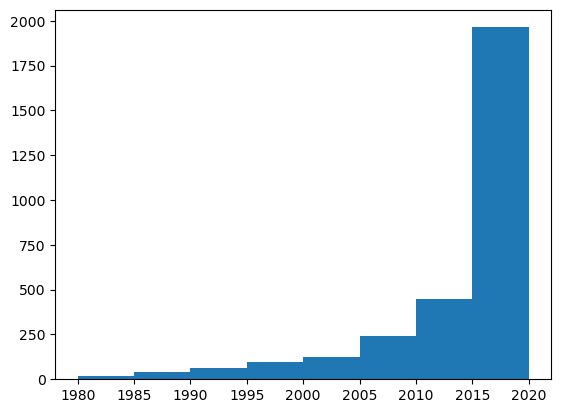

In [63]:
df_us = df[(df['country'] =='United States')]

movie_per_year = df_us

bins = [x for x in range(1980,2022,5)]

plt.hist(df_us.release_year, bins = bins);